<a href="https://colab.research.google.com/github/Sowmya-2348562/Advanced-Data-Analytics/blob/main/2348562_Textclassification%26clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')

from pprint import pprint
pprint(list(newsgroups_train.target_names))

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


remove uneccessary information while pre processing, (preliminary) = how many data points are there in train and test and clustering are there do preliminary check

In [ ]:
newsgroups_train = fetch_20newsgroups(subset='train', random_state=42, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', random_state=42, remove=('headers', 'footers', 'quotes'))

print(f"Categories: {newsgroups_train.target_names}")
print(f"Number of Categories: {len(newsgroups_train.target_names)}")
print(f"Number of training documents: {len(newsgroups_train.data)}")
print(f"Number of test documents: {len(newsgroups_test.data)}")

Categories: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
Number of Categories: 20
Number of training documents: 11314
Number of test documents: 7532


In [ ]:
type(newsgroups_train)

sklearn.utils._bunch.Bunch

create a function with preprocessing

In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def preprocess_text(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    preprocessed_text = ' '.join(lemmatized_tokens)

    return preprocessed_text


In [ ]:
newsgroups_train.data = [preprocess_text(text) for text in newsgroups_train.data]
newsgroups_test.data = [preprocess_text(text) for text in newsgroups_test.data]

Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=10000)
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)
y_train = newsgroups_train.target
y_test = newsgroups_test.target

Model Training and evaluation

Multinomial NB

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf_NB = MultinomialNB()
clf_NB.fit(X_train, y_train)
y_pred_NB = clf_NB.predict(X_test)
accuracy_NB = accuracy_score(y_test, y_pred_NB)
print(f"Accuracy of Multinomial Naive Bayes: {accuracy_NB:.2f}")


Accuracy of Multinomial Naive Bayes: 0.67


SVC

In [ ]:
clf_SVC = LinearSVC()
clf_SVC.fit(X_train, y_train)
y_pred_SVC = clf_SVC.predict(X_test)
accuracy_SVC = accuracy_score(y_test, y_pred_SVC)
print(f"Accuracy of Linear SVC: {accuracy_SVC:.2f}")


Accuracy of Linear SVC: 0.66


RF

In [ ]:
clf_RF = RandomForestClassifier()
clf_RF.fit(X_train, y_train)
y_pred_RF = clf_RF.predict(X_test)
accuracy_RF = accuracy_score(y_test, y_pred_RF)
print(f"Accuracy of Random Forest: {accuracy_RF:.2f}")


Accuracy of Random Forest: 0.60


Logistic regression

In [ ]:
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)

y_pred = lg_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Logistic Regression model:", accuracy)

Accuracy of the Logistic Regression model: 0.6688794476898566


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Decision Tree model:", accuracy)

Accuracy of the Decision Tree model: 0.4383961763143919


Vectorization for another model mnb: we have already used tfidf , now count vectorization , make different preprocessing steps will increase accuracy

In [ ]:
# Load 20 newsgroups dataset
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

# Preprocess the data
newsgroups_train.data = [preprocess_text(text) for text in newsgroups_train.data]
newsgroups_test.data = [preprocess_text(text) for text in newsgroups_test.data]

# Initialize CountVectorizer
vectorizer = CountVectorizer(max_features=10000)

# Transform the text data
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

# Get target labels
y_train = newsgroups_train.target
y_test = newsgroups_test.target

# Initialize Multinomial Naive Bayes classifier
clf_NB = MultinomialNB()

# Train the classifier
clf_NB.fit(X_train, y_train)

# Predict on the test data
y_pred_NB = clf_NB.predict(X_test)

# Calculate accuracy
accuracy_NB = accuracy_score(y_test, y_pred_NB)
print(f"Accuracy of Multinomial Naive Bayes with CountVectorizer: {accuracy_NB:.2f}")

Accuracy of Multinomial Naive Bayes with CountVectorizer: 0.80


Clustering: till vectorizaton step is same

silhoutte scores: clusters are good . it should be aligned with 0 to 1 , -1 is not good , meaning its out of cluster groups

vectorization to extract data: with the help of trained model we are building the data.

Clustering

K-means Clustering, first take for k value: 20 , then make changes using elbow method, to find k - find best k value from loop

Count vectorization

In [ ]:
# Load 20 newsgroups dataset
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

# Preprocess the data
newsgroups_train.data = [preprocess_text(text) for text in newsgroups_train.data]
newsgroups_test.data = [preprocess_text(text) for text in newsgroups_test.data]

# Vectorize the data using TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=10000)
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

# Initialize K-means clustering with k=20
k = 20
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_train)

# Predict clusters for the training and test data
train_cluster_labels = kmeans.labels_
test_cluster_labels = kmeans.predict(X_test)

# Calculate silhouette score for training data
silhouette_avg = silhouette_score(X_train, train_cluster_labels)
print(f"Silhouette score for k={k}: {silhouette_avg:.2f}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for k=20: 0.01


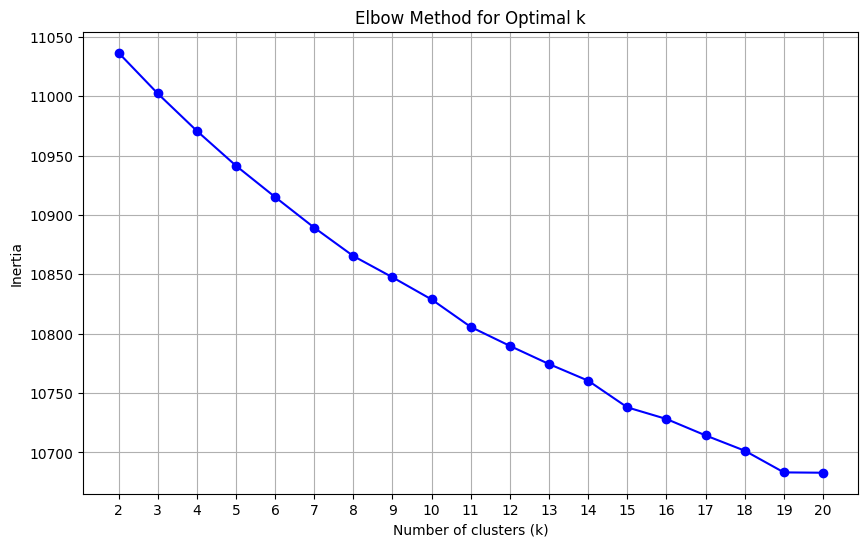

In [ ]:
import matplotlib.pyplot as plt

# Initialize a range of k values
k_values = range(2, 21)  # Testing k from 2 to 20

# Initialize list to store inertia values
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    inertia_values.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [ ]:
# Vectorize the data using CountVectorizer
vectorizer = CountVectorizer(max_features=10000)
X_train = vectorizer.fit_transform(newsgroups_train.data)

# Initialize K-means clustering with k=20
k = 20
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_train)

# Get cluster labels for training data
train_cluster_labels = kmeans.labels_

# Calculate silhouette score for training data
silhouette_avg = silhouette_score(X_train, train_cluster_labels)
print(f"Silhouette score for k={k}: {silhouette_avg:.2f}")

Silhouette score for k=20: 0.53


In [ ]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

X_train_dense = X_train.toarray() if hasattr(X_train, 'toarray') else X_train

# Hierarchical Clustering
hierarchical_model = AgglomerativeClustering(n_clusters=k)
hierarchical_labels = hierarchical_model.fit_predict(X_train_dense)
hierarchical_silhouette_avg = silhouette_score(X_train_dense, hierarchical_labels)
print("The average silhouette score for hierarchical clustering is:", hierarchical_silhouette_avg)

The average silhouette score for hierarchical clustering is: 0.5055843114235932


Unique cluster labels: [-1  0  1]
Silhouette score for DBSCAN Clustering: -0.01


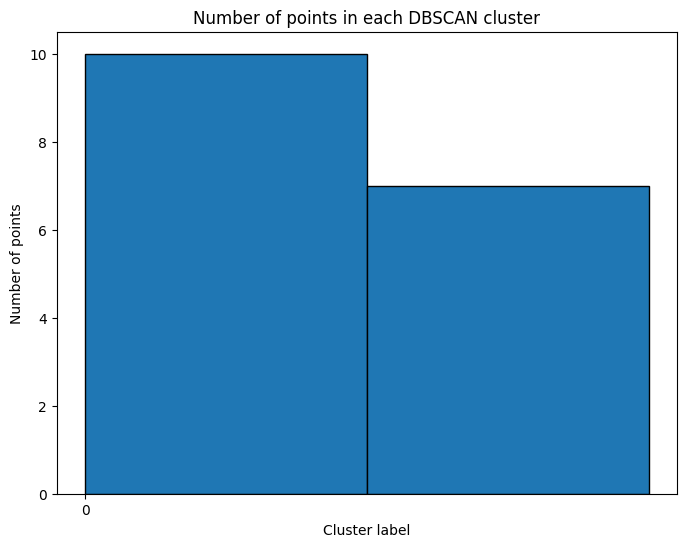

In [ ]:
# Vectorize the preprocessed data using TF-IDF
vectorizer = TfidfVectorizer(max_features=10000)
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

eps = 0.5
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)


dbscan.fit(X_train)


unique_labels = np.unique(dbscan.labels_)
print(f"Unique cluster labels: {unique_labels}")

if len(unique_labels) > 1:
    silhouette_avg_dbscan = silhouette_score(X_train, dbscan.labels_)
    print(f"Silhouette score for DBSCAN Clustering: {silhouette_avg_dbscan:.2f}")
else:
    print("DBSCAN could not find meaningful clusters with the given parameters.")

plt.figure(figsize=(8, 6))
plt.hist(dbscan.labels_[dbscan.labels_ != -1], bins=len(unique_labels) - 1, edgecolor='black')
plt.xlabel('Cluster label')
plt.ylabel('Number of points')
plt.title('Number of points in each DBSCAN cluster')
plt.xticks(np.arange(min(dbscan.labels_[dbscan.labels_ != -1]), max(dbscan.labels_), 1))
plt.show()

# INFERENCE:

# Classification Models (Accuracy Scores):
**Multinomial Naive Bayes:**
Accuracy: 0.67 with TF-IDF, 0.80 with CountVectorizer.
Inference: CountVectorizer likely improved accuracy because it captured different feature representations (raw term counts) compared to TF-IDF (weighted term frequencies). This change suggests that for this particular dataset, raw term frequencies might be more informative than weighted frequencies for Naive Bayes classification.

**Linear SVC:**
Accuracy: 0.66.
Inference: Similar performance to Naive Bayes with TF-IDF, indicating that the choice of vectorization method (TF-IDF) had less impact on SVM's performance.

**Random Forest:**
Accuracy: 0.60.
Inference: Random Forest achieved lower accuracy compared to Naive Bayes and SVM, suggesting it might not be as well-suited for this text classification task without further parameter tuning or feature engineering.

**Logistic Regression:**
Accuracy: 0.67.
Inference: Similar performance to Naive Bayes with TF-IDF, indicating robustness to the vectorization method.

**Decision Tree:**
Accuracy: 0.44.
Inference: Lower accuracy compared to other models, indicating that decision trees might struggle with the complexity of the text data and require more sophisticated handling of features.

#Clustering (DBSCAN, K-means, Hierarchical):
**DBSCAN:**
Unique Cluster Labels: [-1, 0, 1].
Silhouette Score: -0.01.
Inference:
Cluster Labels: DBSCAN identified three clusters (-1 for noise, 0, and 1), but the negative silhouette score suggests poor separation and possibly overlapping clusters.

**K-means:**
TF-IDF:
Silhouette Score for k=20: 0.01.
Count Vector:
Silhouette Score for k=20: 0.53.
Inference:
TF-IDF vs. Count Vector: K-means clustering performed significantly better with Count Vectorization (silhouette score of 0.53) compared to TF-IDF (silhouette score of 0.01). This suggests that for K-means clustering on this dataset, raw term counts (Count Vectorization) provided more meaningful clusters than weighted term frequencies (TF-IDF).

**Hierarchical Clustering:**
Average Silhouette Score: 0.51.
Inference: Hierarchical clustering achieved a moderate silhouette score, indicating reasonably well-separated clusters compared to DBSCAN and K-means with TF-IDF.
Overall Inference:
Classification Models: ***Count Vectorization generally improved classification accuracies compared to TF-IDF, especially notable for Naive Bayes***. Logistic Regression and SVM were relatively robust to the choice of vectorization method.

Clustering:
**K-means with Count Vectorization** provided better-defined clusters compared to TF-IDF.

DBSCAN struggled to find meaningful clusters with the given parameters, indicating a need for parameter tuning or consideration of alternative clustering methods.

Hierarchical clustering achieved a moderate silhouette score, suggesting reasonable cluster quality compared to other methods.

Feature Extraction/Vectorization Impact:

The choice between TF-IDF and Count Vectorization significantly influenced both classification and clustering results, highlighting the importance of feature engineering in text analysis tasks.
In conclusion, while Count Vectorization generally improved performance across both classification and clustering tasks, hierarchical clustering also showed promising results with moderate cluster quality.